<a href="https://colab.research.google.com/github/Aleksypruszkowski/Machine-Learning-MIMUW/blob/main/Lab01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1 - PCA
### Author: Aleksy Pruszkowski

# **Homework Assignment: Principal Component Analysis (PCA) on 3D Clustered Data**

-------------------------------

You are provided with a dataset containing 3-dimensional data points from three distinct classes. The dataset can be downloaded from the following link:

**[PCA Three Clusters Dataset](https://github.com/SzymonNowakowski/Machine-Learning-2024/blob/master/PCA_three_clusters_data.csv)**

Each data point is represented by three continuous features $(x, y, z)$ and belongs to one of three clusters.

## **Primary Question**

**Perform PCA on the provided dataset to find the two principal components and visualize the data in a 2D plot using these components.**

- Compare this PCA plot with the following 2D plots of the original data:
  - $x$ vs. $y$
  - $x$ vs. $z$
  - $y$ vs. $z$

**Does PCA improve the separation of data points from different clusters compared to the original feature spaces? Explain why.**



## **Secondary Question**

Remember: before applying PCA, **standardize** the data so that each feature has a mean of 0 and a variance of 1.

**Why is standardization necessary before applying PCA?**

- Reflect on how differences in scale among features can impact the principal component directions.

## **Task & Deliverables**

1. **Colab Notebook**  
   - Create a **Colab notebook** that:
     - Performs PCA on the dataset and visualizes the first two principal components in a 2D scatter plot.
     - Includes separate 2D scatter plots for the original feature pairs: $(x, y)$, $(x, z)$, and $(y, z)$.
     - Clearly **answers** both the **primary** and **secondary** questions.
     - Uses Python code to perform PCA, standardize the data, and generate the required plots.
   - To answer the primary question, you may consider creating additional visualizations or charts beyond those listed above. For example, some students might choose to explore a 3D plot of the data. Feel free to experiment with different approaches.

2. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and include an **“Open in Colab”** badge in your notebook, so it can be launched directly from GitHub.

#### We start with loading the dataset, centering and standardising.


In [ ]:
import pandas as pd
import numpy as np

data_3D = pd.read_csv("https://raw.githubusercontent.com/SzymonNowakowski/Machine-Learning-2024/refs/heads/master/PCA_three_clusters_data.csv")
df = pd.DataFrame(data_3D)

X = df.iloc[:,0:3]
Y = df.iloc[:,3]

X = X - np.mean(X, axis=0)
X = X / np.std(X, axis=0)

df_notscaled = pd.DataFrame(data_3D)
X_notscaled = df_notscaled.iloc[:,0:3]
Y_notscaled = df_notscaled.iloc[:,3]

#### Wisualizing the scaled dataset on a 3d plot

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA
fig = px.scatter_3d(
    X, x='x', y='y', z='z', color=df['class'],
    title="3D dataset scaled",
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

#### Wisualizing the original dataset on a 3d plot

In [ ]:
fig = px.scatter_3d(
    X_notscaled, x='x', y='y', z='z', color=df['class'],
    title="3D dataset not scaled",
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [ ]:
print(f"Standard deviation in each column for not scaled data: ")
for i in range(0,3):
  print(i," ",statistics.stdev(X_notscaled.iloc[:,i]))

Standard deviation in each column for not scaled data: 
0   2.3003714750737205
1   1.5294093269658162
2   6.3265278583072595


#### The plot above shows that the dataset is heavily dispersed along the z axis. Not standardising the data may cause the principal directions to be biased to the variables with highest standard deviation.

#### Performing the PCA

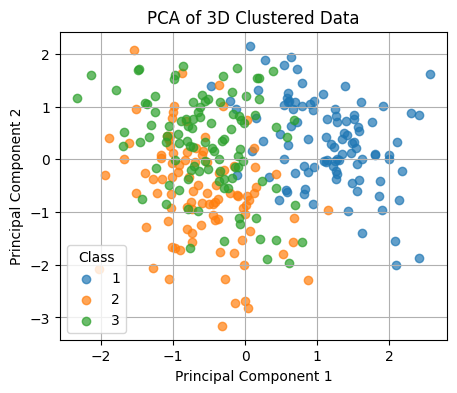

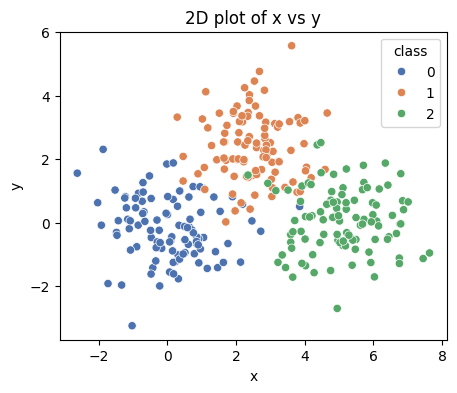

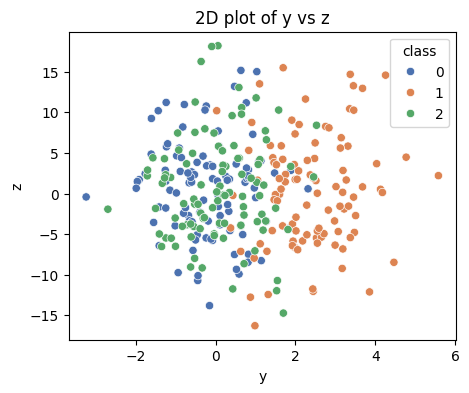

Text(0.5, 1.0, '2D plot of x vs z')

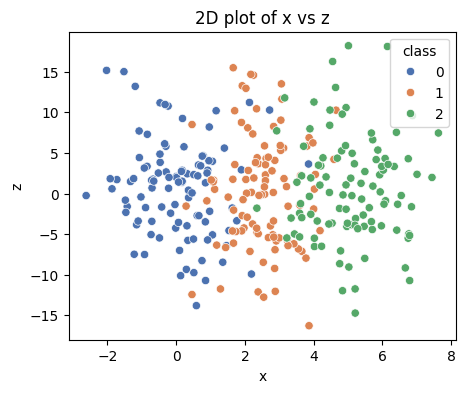

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

U, Sigma, VT = np.linalg.svd(X)
Sigma_full = np.zeros((X.shape[0], X.shape[1]))
np.fill_diagonal(Sigma_full, Sigma)
XV = U @ Sigma_full
target_name = np.array([1,2,3])

plt.figure(figsize=(5, 4))
for i, target_name in enumerate(target_name):
    plt.scatter(XV[Y == i, 0], XV[Y == i, 1], label=target_name, alpha=0.7)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of 3D Clustered Data")
plt.legend(title="Class")
plt.grid(True)
plt.show()

plt.figure(figsize=(5, 4))
sns.scatterplot(x='x', y='y', data=df, hue='class',palette="deep")
plt.title("2D plot of x vs y")
plt.show()
plt.figure(figsize=(5, 4))
sns.scatterplot(x='y', y='z', data=df, hue='class',palette="deep")
plt.title("2D plot of y vs z")
plt.show()
plt.figure(figsize=(5, 4))
sns.scatterplot(x='x', y='z', data=df, hue='class',palette="deep")
plt.title("2D plot of x vs z")

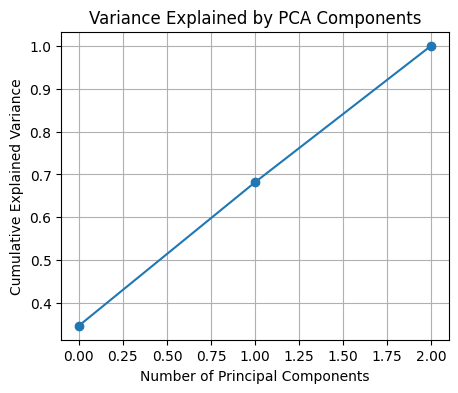

In [38]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)
plt.figure(figsize=(5, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_[:20]), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Variance Explained by PCA Components")
plt.grid(True)
plt.show()

### We see that first two components explain ~70% of variance, it's not enough to have an accurate model.

In [ ]:
import statistics
U_notscaled, Sigma_notscaled, VT_notscaled = np.linalg.svd(X_notscaled)
print(f"Singular values for scaled data: {Sigma}")
print(f"Singular values for not scaled data: {Sigma_notscaled}")

Singular values for scaled data: [17.67768328 17.34867462 16.92699037]
Singular values for not scaled data: [109.74492713  60.65542771  27.11887009]


#### Let's look now at the principal components of the original dataset (before standardizing)

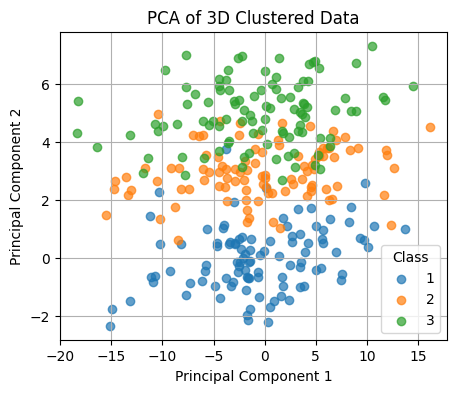

In [ ]:
Sigma_full_notscaled = np.zeros((X_notscaled.shape[0], X_notscaled.shape[1]))
np.fill_diagonal(Sigma_full_notscaled, Sigma_notscaled)
XV_notscaled = U_notscaled @ Sigma_full_notscaled
target_name_notscaled = np.array([1,2,3])

plt.figure(figsize=(5, 4))
for i, target_name in enumerate(target_name_notscaled):
    plt.scatter(XV_notscaled[Y == i, 0], XV_notscaled[Y == i, 1], label=target_name, alpha=0.7)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of 3D Clustered Data")
plt.legend(title="Class")
plt.grid(True)
plt.show()

#### PCA on standardised data seems to better separate the clusters. There are several reasons why that may be the case:
- PCA is not designed to group the data but to detect the directions of maximum variance
- Variables seem to be uncorralated, PCA is therefore not useful for dimensionality reduction.

          x         y         z
x  1.000000  0.034832 -0.025644
y  0.034832  1.000000  0.003411
z -0.025644  0.003411  1.000000


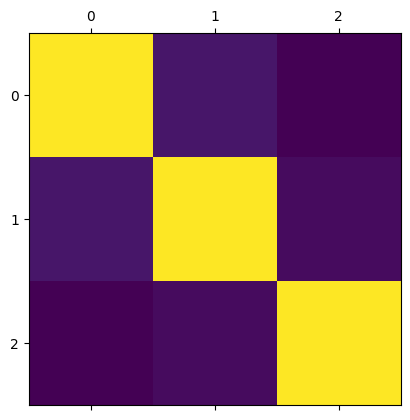

In [37]:
plt.matshow(X.corr())
print(X.corr())